## Project - Bank Churn prediction

 
### In this project, we aim to predict the churn for a bank, i.e, given a Bank customer, can we build a classifier which can determine whether they will leave or not using Neural networks

### Objective:
Given a Bank customer, build a neural network based classifier that can determine whether they will leave or not in the next 6 months. 
### Context:
Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Data Description:
The case study is from an open-source dataset from Kaggle.The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc.
Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modelingPoints 



In [ ]:
# !pip install tensorflow==2.0

     |████████████████████████████████| 86.3MB 67kB/s 
     |████████████████████████████████| 3.8MB 36.9MB/s 
     |████████████████████████████████| 450kB 46.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=01bc436098ac3a0be52e90fa06704ec65f7af2571bcdff549cadf534a89d2b05
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.2
    Uninstalling tensorflow-1.15.2:
      Successfully uninstalled tensorflow-1.15.2


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Read the dataset

In [ ]:
# ds = pd.read_csv("/content/drive/My Drive/Colab Notebooks/bank.csv")
ds = pd.read_csv("bank.csv")

In [ ]:
ds.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


#### Drop the columns which are unique for all users like IDs

In [ ]:
#RowNumber #CustomerId and #Surname are unique hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


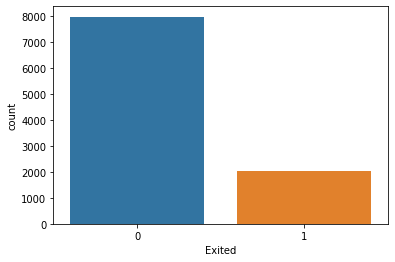

In [ ]:
sns.countplot(ds['Exited']);

In [ ]:
ds['Exited'].value_counts(True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [ ]:
ds['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

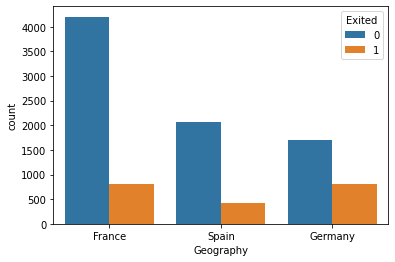

In [ ]:
sns.countplot(x='Geography',hue='Exited',data=ds);

In [ ]:
ds[ds['Exited']==1]['Geography'].value_counts()/ds['Geography'].value_counts()

France     0.161548
Germany    0.324432
Spain      0.166734
Name: Geography, dtype: float64

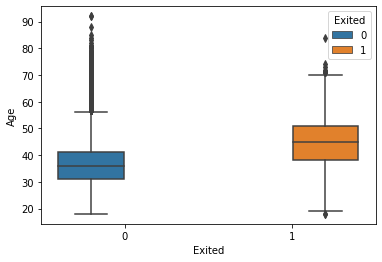

In [ ]:
sns.boxplot(y= ds['Age'],x= ds['Exited'], hue=ds['Exited'])

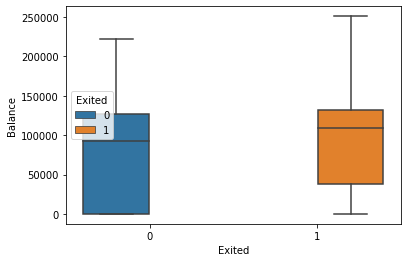

In [ ]:
sns.boxplot(y= ds['Balance'],x= ds['Exited'], hue=ds['Exited'])

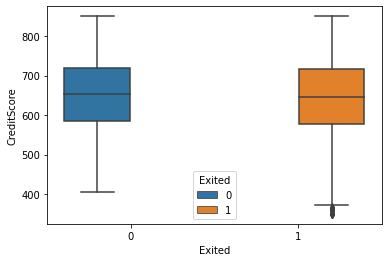

In [ ]:
sns.boxplot(y= ds['CreditScore'],x= ds['Exited'], hue=ds['Exited'])

#### Distinguish the feature and target set

In [ ]:
X = ds.iloc[:,0:10].values # Credit Score through Estimated Salary
y = ds.iloc[:,10].values # Exited

In [ ]:
# Encoding categorical (string based) data. Country: there are 3 options: France, Spain and Germany
# This will convert those strings into scalar values for analysis
print(X[:8,1], '... will now become: ')

label_X_country_encoder = LabelEncoder()
X[:,1] = label_X_country_encoder.fit_transform(X[:,1])
print(X[:8,1])

['France' 'Spain' 'France' 'France' 'Spain' 'Spain' 'France' 'Germany'] ... will now become: 
[0 2 0 0 2 2 0 1]


In [ ]:
# We will do the same thing for gender. this will be binary in this dataset
print(X[:6,2], '... will now become: ')

label_X_gender_encoder = LabelEncoder()
X[:,2] = label_X_gender_encoder.fit_transform(X[:,2])
print(X[:6,2])

['Female' 'Female' 'Female' 'Female' 'Female' 'Male'] ... will now become: 
[0 0 0 0 0 1]


In [ ]:
# The Problem here is that we are treating the countries as one variable with ordinal values (0 < 1 < 2). 
# Therefore, one way to get rid of that problem is to split the countries into respective dimensions.
# Gender does not need this as it is binary

# Converting the string features into their own dimensions. Gender doesn't matter here because its binary
#countryhotencoder = OneHotEncoder(categories = [1]) # 1 is the country column
countryhotencoder = ColumnTransformer([("countries", OneHotEncoder(), [1])], remainder="passthrough")
X = countryhotencoder.fit_transform(X)
#X = countryhotencoder.fit_transform(X).toarray()

In [ ]:
X.shape

(10000, 12)

In [ ]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
# A 0 on two countries means that the country has to be the one variable which wasn't included 
# This will save us from the problem of using too many dimensions
X = X[:,1:] # Got rid of Spain as a dimension.

#### Divide the data set into Train and test sets

In [ ]:
# Splitting the dataset into the Training and Testing set.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

#### Normalize the train and test data

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Initialize & build the model

In [ ]:
# Initializing the ANN
classifier = Sequential()

In [ ]:
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 6.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
classifier.add(Dense(activation = 'relu', input_dim = 11, units=6, kernel_initializer='uniform'))

In [ ]:
#Add 1st hidden layer
classifier.add(Dense(6, activation='sigmoid', kernel_initializer='uniform'))

In [ ]:
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
classifier.add(Dense(1, activation = 'sigmoid', kernel_initializer='uniform')) 

In [ ]:
# Create optimizer with default learning rate
# Compile the model
classifier.compile(optimizer='SGD', loss='mse', metrics=['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_24 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier.fit(X_train, y_train,           
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.2259 - accuracy: 0.7668 - val_loss: 0.1826 - val_accuracy: 0.7975
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.1802 - accuracy: 0.7900 - val_loss: 0.1682 - val_accuracy: 0.7975
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.1654 - accuracy: 0.8006 - val_loss: 0.1641 - val_accuracy: 0.7975
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.1646 - accuracy: 0.7956 - val_loss: 0.1626 - val_accuracy: 0.7975
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.1628 - accuracy: 0.7969 - val_loss: 0.1620 - val_accuracy: 0.7975
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.1663 - accuracy: 0.7897 - val_loss: 0.1618 - val_accuracy: 0.7975
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.1664 - accuracy: 0.7893 - val_loss: 0.1616 - val_accuracy: 0.7975

#### Predict the results using 0.5 as a threshold

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred)

[[0.20384857]
 [0.20413047]
 [0.20374611]
 ...
 [0.2039234 ]
 [0.20379254]
 [0.20367426]]


In [ ]:
# To use the confusion Matrix, we need to convert the probabilities that a customer will leave the bank into the form true or false. 
# So we will use the cutoff value 0.5 to indicate whether they are likely to exit or not.
y_pred = (y_pred > 0.5)
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


#### Print the Accuracy score and confusion matrix

In [ ]:
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)

[[1595    0]
 [ 405    0]]


In [ ]:
accuracy_model1 = ((cm1[0][0]+cm1[1][1])*100)/(cm1[0][0]+cm1[1][1]+cm1[0][1]+cm1[1][0])
print (accuracy_model1, '% of testing data was classified correctly')

79.75 % of testing data was classified correctly


#### Optimize the model

Some important parameters to look out for while optimizing neural networks are:

-Type of architecture

-Number of Layers

-Number of Neurons in a layer

-Regularization parameters

-Learning Rate

-Type of optimization / backpropagation technique to use

-Dropout rate

-Weight sharing

##### Number of Layers:
We will keep it similar to the above model so that we can compare the accuracy.
1 hidden layer.

##### Activation:
input layer: relu becasue we are in an input layer. uses the ReLu activation function for  ϕ
output layer: sigmoid becasue we are in an output layer. uses the Sigmoid activation function for  ϕ . This is used instead of the ReLu function becasue it generates probabilities for the outcome. We want the probability that each customer leaves the bank.

##### Type of optimization / backpropagation technique to use: 
We will use Adam. Adam is a very efficeint variation of Stochastic Gradient Descent. For Adam and its variant, learning rate or the decay rate does not really matter too much.

##### Learning Rate:
default learning rate 0.001.

##### Number of Neurons in a layer:
We will keep it 6 as per our initial calculation above.

##### Weight sharing / kernel_initializer: 
uniform the distribution with which we randomly initialize weights for the nodes in this layer.

##### Loss:
loss: binary_crossentropy This is the loss function used within adam. This should be the logarthmic loss. If our dependent (output variable) is Binary, it is binary_crossentropy. If Categorical, then it is called categorical_crossentropy

Rebuilding the model using these optimised parameters

In [ ]:
# Initializing the ANN
Oclassifier = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
Oclassifier.add(Dense(activation = 'relu', input_dim = 11, units=6, kernel_initializer='uniform'))

In [ ]:
# Adding the hidden layer
# Notice that we do not need to specify input dim. 
Oclassifier.add(Dense(activation = 'relu', units=6, kernel_initializer='uniform')) 

In [ ]:
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
Oclassifier.add(Dense(activation = 'sigmoid', units=1, kernel_initializer='uniform')) 

In [ ]:
Oclassifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
Oclassifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Omodel = Oclassifier.fit(X_train, y_train,           
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32)

Epoch 1/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8356 - val_loss: 0.3970 - val_accuracy: 0.8415
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3997 - accuracy: 0.8359 - val_loss: 0.3975 - val_accuracy: 0.8430
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3998 - accuracy: 0.8355 - val_loss: 0.4000 - val_accuracy: 0.8425
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8354 - val_loss: 0.3984 - val_accuracy: 0.8440
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3998 - accuracy: 0.8366 - val_loss: 0.3981 - val_accuracy: 0.8435
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3994 - accuracy: 0.8360 - val_loss: 0.3973 - val_accuracy: 0.8420
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3996 - accuracy: 0.8360 - val_loss: 0.3976 - val_accuracy: 0.8425

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


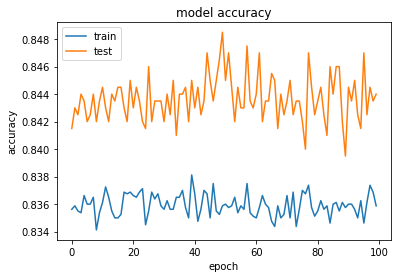

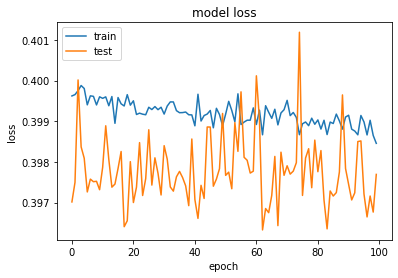

In [ ]:
print(Omodel.history.keys())
# summarize history for accuracy
plt.plot(Omodel.history['accuracy'])
plt.plot(Omodel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(Omodel.history['loss'])
plt.plot(Omodel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Predict the results using 0.5 as a threshold

In [ ]:
y_pred = Oclassifier.predict(X_test)
print(y_pred)

[[0.23899522]
 [0.37020344]
 [0.1461854 ]
 ...
 [0.1817734 ]
 [0.18017903]
 [0.12245449]]


In [ ]:
# To use the confusion Matrix, we need to convert the probabilities that a customer will leave the bank into the form true or false. 
# So we will use the cutoff value 0.5 to indicate whether they are likely to exit or not.
y_pred = (y_pred > 0.5)
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


#### Print the Accuracy score and confusion matrix

In [ ]:
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

[[1529   66]
 [ 246  159]]


In [ ]:
accuracy_model2 = ((cm2[0][0]+cm2[1][1])*100)/(cm2[0][0]+cm2[1][1]+cm2[0][1]+cm2[1][0])
print (accuracy_model2, '% of testing data was classified correctly')

84.4 % of testing data was classified correctly


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1595
           1       0.71      0.39      0.50       405

    accuracy                           0.84      2000
   macro avg       0.78      0.68      0.71      2000
weighted avg       0.83      0.84      0.83      2000



In [ ]:
y_pred = (y_pred > 0.6)
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [ ]:
# 75% acc

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1595
           1       0.71      0.39      0.50       405

    accuracy                           0.84      2000
   macro avg       0.78      0.68      0.71      2000
weighted avg       0.83      0.84      0.83      2000



In [ ]:
# Initializing the ANN
Fclassifier = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
Fclassifier.add(Dense(activation = 'tanh', input_dim = 11, units=3, kernel_initializer='he_uniform',bias_initializer='zeros'))
Fclassifier.add(Dense(activation = 'tanh',  units=3, kernel_initializer='he_uniform',bias_initializer='zeros'))
Fclassifier.add(Dense(activation = 'tanh',  units=2, kernel_initializer='he_uniform',bias_initializer='zeros'))
Fclassifier.add(Dense(activation = 'sigmoid', units=1, kernel_initializer='he_uniform',bias_initializer='zeros'))
Fclassifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
fmodel = Fclassifier.fit(X_train, y_train,           
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.6544 - accuracy: 0.6343 - val_loss: 0.4846 - val_accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4709 - accuracy: 0.7980 - val_loss: 0.4550 - val_accuracy: 0.7995
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4621 - accuracy: 0.7949 - val_loss: 0.4449 - val_accuracy: 0.8060
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4379 - accuracy: 0.8101 - val_loss: 0.4402 - val_accuracy: 0.8055
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4330 - accuracy: 0.8114 - val_loss: 0.4357 - val_accuracy: 0.8060
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4420 - accuracy: 0.8033 - val_loss: 0.4291 - val_accuracy: 0.8090
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4335 - accuracy: 0.8036 - val_loss: 0.4221 - val_accuracy: 0.8100

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


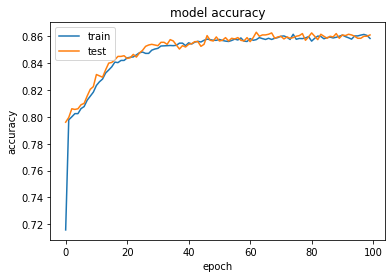

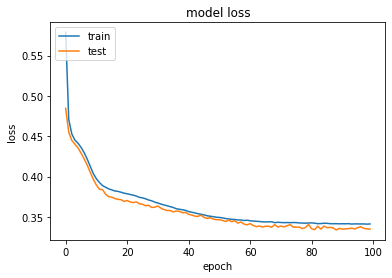

In [ ]:
print(fmodel.history.keys())
# summarize history for accuracy
plt.plot(fmodel.history['accuracy'])
plt.plot(fmodel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(fmodel.history['loss'])
plt.plot(fmodel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if (logs.get('loss')<0.41):
      print('\n loss is sufficiently low, cancel training')
      self.model.stop_training=True

In [ ]:
callbacks = myCallback()
# Initializing the ANN
Fclassifier = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
Fclassifier.add(Dense(activation = 'relu', input_dim = 11, units=6, kernel_initializer='uniform',bias_initializer='zeros'))

Fclassifier.add(Dense(activation = 'relu',  units=6, kernel_initializer='uniform',bias_initializer='zeros'))

Fclassifier.add(Dense(activation = 'sigmoid', units=1, kernel_initializer='uniform',bias_initializer='zeros'))

Fclassifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

fmodel = Fclassifier.fit(X_train, y_train,           
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32,
          callbacks= [callbacks])

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.6355 - accuracy: 0.7929 - val_loss: 0.4391 - val_accuracy: 0.7975
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4380 - accuracy: 0.7920 - val_loss: 0.4275 - val_accuracy: 0.7975
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.7966 - val_loss: 0.4247 - val_accuracy: 0.7975
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4243 - accuracy: 0.7917 - val_loss: 0.4215 - val_accuracy: 0.7975
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4172 - accuracy: 0.7986 - val_loss: 0.4185 - val_accuracy: 0.7975
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4143 - accuracy: 0.7979 - val_loss: 0.4170 - val_accuracy: 0.8250
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4257 - accuracy: 0.8182 - val_loss: 0.4147 - val_accuracy: 0.8315

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


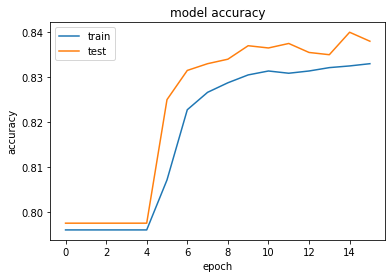

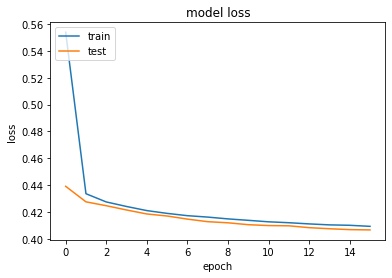

In [ ]:
print(fmodel.history.keys())
# summarize history for accuracy
plt.plot(fmodel.history['accuracy'])
plt.plot(fmodel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(fmodel.history['loss'])
plt.plot(fmodel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### The optimised model gives better results as seen from the confusion matrix as well as improved accuracy.


We encourage the learners to further look for optimizing the model and come up with better results.

#### Happy Learning!